<a href="https://colab.research.google.com/github/maryamdarei/CNN/blob/main/NEW_CNN_with_GRADCAM_my%20data_fine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It iS a package, from Githup:


"""
CNN trained on a small imagenet dataset
Imagenette is a subset of 10 easily classified classes from 
Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute).
https://github.com/fastai/imagenette
Download the Imagenette dataset from Github to Imageneet folder
"""


https://github.com/alexcpn/cnn_train



In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Herbarium Data-2019/SavedModel

/content/drive/MyDrive/Herbarium Data-2019/SavedModel


In [ ]:
!tar xzvf imagenette2-320.tgz

In [ ]:
!pip install models

In [3]:

import logging as log
import os
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from matplotlib import ticker
#I commented this:
#from models import alexnet, mycnn, mycnn2, resnet
from torch.utils.tensorboard import SummaryWriter


In [ ]:
!pwd

/content/drive/MyDrive/Herbarium Data-2019/SavedModel


In [4]:

log.basicConfig(format="%(asctime)s %(message)s", level=log.INFO)
log.info("======= starting to log ========")
torch.cuda.empty_cache()

In [5]:
#change the log code
log.basicConfig(filename="/content/drive/MyDrive/Model Data/Logs/logs.log",format="%(asctime)s %(message)s", level=log.INFO)
log.info("======= starting to log ========")
torch.cuda.empty_cache()

In [ ]:
!cat /drive/MyDrive/Model Data/Logs/logs.log

cat: /drive/MyDrive/Model: No such file or directory
cat: Data/Logs/logs.log: No such file or directory


In [6]:

# Define relevant variables for the ML task
num_classes = 683
learning_rate = 0.001
num_epochs = 20  # actual 20 epochs
workers = 0
pin_memory = False
batch_size = 64
#I commented these:
#torch.cuda.empty_cache()
#torch.cuda.reset_max_memory_allocated()
#torch.cuda.synchronize()


In [7]:

# Device will determine whether to run the training on GPU or CPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if device.type == "cuda":
    deviceid = torch.cuda.current_device()
    log.info(f"Gpu device {torch.cuda.get_device_name(deviceid)}")


-------------------------------------------------------------------------------------------------------
# Select the model you want to train
-------------------------------------------------------------------------------------------------------



In [ ]:
#I did not run this part for my data/ It is good idea if run some models and compare them
modelname = "alexnet_"

if modelname == "mycnn_":
    # Actual image size is 432*320
    model = mycnn.MyCNN().to(device)
    resize_to = transforms.Resize((227, 227))
if modelname == "mycnn2_":
    # Actual image size is 432*320
    model = mycnn2.MyCNN2().to(device)
    resize_to = transforms.Resize((227, 227))
#if modelname == "alexnet_":
    # Alexnet model works well for CIFAR-10 when input is scaled to 227x227
    model = alexnet.AlexNet().to(device)
    resize_to = transforms.Resize((227, 227))

if modelname == "RestNet50_":
    model = resnet.ResNet50(img_channel=3, num_classes=10).to(device)
    # resizing lower to keep it in memory
    resize_to = transforms.Resize((227, 227))

In [8]:
modelname = "RestNet50_"


In [9]:
import os
from PIL import Image

def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r


if __name__ == "__main__":
    paths = list_files("/content/drive/MyDrive/Herbarium Data-2019/Data/val")
    problem_files =[]
    for path in paths:
        with open(path, 'rb') as file:
            try:
                img = Image.open(file).load()
            except Exception as e:
                print(e)
                print(path)
                problem_files.append(path)


In [10]:

# -------------------------------------------------------------------------------------------------------
# Load the data from image folder
# -------------------------------------------------------------------------------------------------------

data_dir = "/content/drive/MyDrive/Herbarium Data-2019/Data"
train_dir = os.path.join(data_dir, "train")
normalize_transform = transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
)

# I changed the code for resize the image:
train_transforms = transforms.Compose(
    [
        
        transforms.Resize((277,277)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomGrayscale(0.5),
        transforms.ToTensor(),
        normalize_transform,
    ]
)

val_dir = os.path.join(data_dir, "val")

val_transforms = transforms.Compose(
    [transforms.Resize((277,277)), transforms.ToTensor(), normalize_transform]
)


train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)


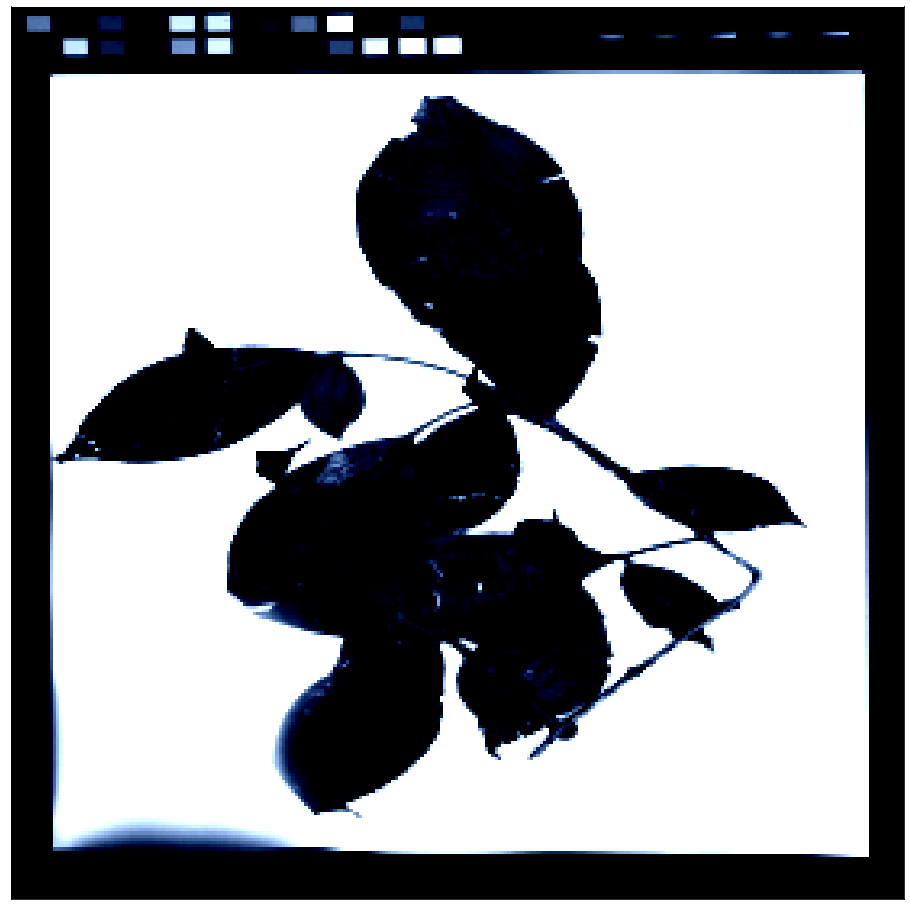

In [11]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,20))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dataset)


In [19]:
train_dataset.class_to_idx

{'0': 0,
 '1': 1,
 '10': 2,
 '100': 3,
 '101': 4,
 '102': 5,
 '103': 6,
 '104': 7,
 '105': 8,
 '106': 9,
 '107': 10,
 '108': 11,
 '109': 12,
 '11': 13,
 '110': 14,
 '111': 15,
 '112': 16,
 '113': 17,
 '114': 18,
 '115': 19,
 '116': 20,
 '117': 21,
 '118': 22,
 '119': 23,
 '12': 24,
 '120': 25,
 '121': 26,
 '122': 27,
 '123': 28,
 '124': 29,
 '125': 30,
 '126': 31,
 '127': 32,
 '128': 33,
 '129': 34,
 '13': 35,
 '130': 36,
 '131': 37,
 '132': 38,
 '133': 39,
 '134': 40,
 '135': 41,
 '136': 42,
 '137': 43,
 '138': 44,
 '139': 45,
 '14': 46,
 '140': 47,
 '141': 48,
 '142': 49,
 '143': 50,
 '144': 51,
 '145': 52,
 '146': 53,
 '147': 54,
 '148': 55,
 '149': 56,
 '15': 57,
 '150': 58,
 '151': 59,
 '152': 60,
 '153': 61,
 '154': 62,
 '155': 63,
 '156': 64,
 '157': 65,
 '158': 66,
 '159': 67,
 '16': 68,
 '160': 69,
 '161': 70,
 '162': 71,
 '163': 72,
 '164': 73,
 '165': 74,
 '166': 75,
 '167': 76,
 '168': 77,
 '169': 78,
 '17': 79,
 '170': 80,
 '171': 81,
 '172': 82,
 '173': 83,
 '174': 84,
 '

In [12]:

# -----------------------------------------------------------------------------------------------------
# Order the categories as per how Dataloader loads it
# -----------------------------------------------------------------------------------------------------

foldername_to_class = {

"0"   :   "   Miconia approximata Gamba & Almeda",
"1"   :   "   Miconia ibaguensis (Bonpl.) Triana",
"2"   :   "   Leandra nianga (DC.) Cogn.",
"3"   :   "   Tibouchina semidecandra Cogn.",
"4"   :   "   Miconia racemosa (Aubl.) DC.",
"5"   :   "   Comolia lythrarioides Naudin",
"6"   :   "   Mouriri myrtilloides (Sw.) Poir.",
"7"   :   "   Miconia corymbiformis Cogn.",
"8"   :   "   Macairea parvifolia Benth.",
"9"   :   "   Brachyotum strigosum (L.f.) Triana",
"10"   :   "   Clidemia bullosa DC.",
"11"   :   "   Mouriri sagotiana Triana",
"12"   :   "   Blakea henripittieri (Cogn.) Penneys & Almeda",
"13"   :   "   Clidemia debilis Crueg.",
"14"   :   "   Comolia veronicaefolia Benth.",
"15"   :   "   Centradenia inaequilateralis (Schltdl. & Cham.) G.Don",
"16"   :   "   Miconia impetiolaris (Sw.) D.Don ex DC.",
"17"   :   "   Graffenrieda harlingii Wurdack",
"18"   :   "   Tibouchina ciliaris (Vent.) Cogn.",
"19"   :   "   Salpinga secunda Schrank & Mart. ex DC.",
"20"   :   "   Tibouchina fothergillae (DC.) Cogn.",
"21"   :   "   Miconia donaeana Naudin",
"22"   :   "   Tococa carolensis Gleason",
"23"   :   "   Henriettea sylvestris (Gleason) J.F.Macbr.",
"24"   :   "   Mouriri nigra (DC.) Morley",
"25"   :   "   Ossaea cucullata Gleason",
"26"   :   "   Mouriri francavillana Cogn.",
"27"   :   "   Tococa erythrophylla (Ule) Wurdack",
"28"   :   "   Miconia compressa Naudin",
"29"   :   "   Marcetia ericoides (Spreng.) Cogn.",
"30"   :   "   Tococa oligantha Gleason",
"31"   :   "   Conostegia cuatrecasii Gleason",
"32"   :   "   Clidemia ombrophila Gleason",
"33"   :   "   Miconia lateriflora Cogn.",
"34"   :   "   Miconia holosericea (L.) DC.",
"35"   :   "   Tetrazygia fadyenii Hook.",
"36"   :   "   Tetrazygia angustifolia (Sw.) DC.",
"37"   :   "   Monochaetum deppeanum (Schltdl. & Cham.) Naudin",
"38"   :   "   Miconia calvescens DC.",
"39"   :   "   Leandra clidemioides (Naudin) Wurdack",
"40"   :   "   Leandra longicoma Cogn.",
"41"   :   "   Leandra carassana (DC.) Cogn.",
"42"   :   "   Trembleya laniflora Cogn.",
"43"   :   "   Tibouchina heteromalla (D.Don) Cogn.",
"44"   :   "   Leandra subseriata (Naudin) Cogn.",
"45"   :   "   Mouriri myrtifolia Spruce ex Triana",
"46"   :   "   Axinaea macrophylla (Naudin) Triana",
"47"   :   "   Ossaea pauciflora (Naudin) Urb.",
"48"   :   "   Aciotis caulialata (Ruiz & Pav.) Triana",
"49"   :   "   Clidemia tepuiensis Wurdack",
"50"   :   "   Aciotis circaeifolia (Bonpl.) Triana",
"51"   :   "   Miconia gracilis Triana",
"52"   :   "   Miconia ciliata (Rich.) DC.",
"53"   :   "   Graffenrieda limbata Triana",
"54"   :   "   Leandra rhamnifolia (Naudin) Cogn.",
"55"   :   "   Tibouchina herbacea (DC.) Cogn.",
"56"   :   "   Miconia cannabina Markgr.",
"57"   :   "   Miconia salicifolia (Bonpl. ex Naudin) Naudin",
"58"   :   "   Miconia argyrophylla DC.",
"59"   :   "   Comolia coriacea Gleason",
"60"   :   "   Pachyloma huberioides (Naudin) Triana",
"61"   :   "   Blakea portentosa Wurdack",
"62"   :   "   Blakea gracilis Hemsl.",
"63"   :   "   Clidemia petiolaris (Schltdl. & Cham.) Triana",
"64"   :   "   Blakea repens Ruiz & Pav.",
"65"   :   "   Miconia pepericarpa DC.",
"66"   :   "   Miconia petropolitana Cogn.",
"67"   :   "   Mouriri crassifolia Sagot",
"68"   :   "   Tibouchina arborea (Gardner) Cogn.",
"69"   :   "   Tibouchina bicolor (Naudin) Cogn.",
"70"   :   "   Miconia stephananthera Ule",
"71"   :   "   Tococa stephanotricha Naudin",
"72"   :   "   Aciotis polystachya (Bonpl.) Triana",
"73"   :   "   Clidemia epiphytica (Triana) Cogn.",
"74"   :   "   Miconia cuspidata Naudin",
"75"   :   "   Lavoisiera imbricata DC.",
"76"   :   "   Clidemia ciliata Pav. ex D.Don",
"77"   :   "   Heterocentron subtriplinervium (Link & Otto) A.Braun & Bouchn++",
"78"   :   "   Miconia lamprophylla Triana",
"79"   :   "   Henriettea stellaris O.Berg ex Triana",
"80"   :   "   Desmoscelis villosa (Aubl.) Naudin",
"81"   :   "   Tibouchina fissinervia (DC.) Cogn.",
"82"   :   "   Leandra hirta Raddi",
"83"   :   "   Conostegia oerstediana O.Berg ex Triana",
"84"   :   "   Tetrazygia bicolor (Mill.) Cogn.",
"85"   :   "   Miconia heliotropoides Triana",
"86"   :   "   Tococa macrosperma Mart.",
"87"   :   "   Miconia paleacea Cogn.",
"88"   :   "   Conostegia speciosa Naudin",
"89"   :   "   Comolia ovalifolia (DC.) Triana",
"90"   :   "   Tococa bullifera Mart. & Schrank ex DC.",
"91"   :   "   Meriania tomentosa (Cogn.) Wurdack",
"92"   :   "   Leandra micropetala (Naudin) Cogn.",
"93"   :   "   Miconia tristis Spring",
"94"   :   "   Leandra mexicana (Naudin) Cogn.",
"95"   :   "   Miconia decurrens Cogn.",
"96"   :   "   Noterophila limnobios (DC.) Mart.",
"97"   :   "   Marcetia taxifolia (A.St.-Hil.) DC.",
"98"   :   "   Miconia tuberculata (Naudin) Triana",
"99"   :   "   Leandra salicina (Ser. ex DC.) Cogn.",
"100"   :   "   Blakea multiflora Don",
"101"   :   "   Tibouchina laxa (Desr.) Cogn.",
"102"   :   "   Miconia quinquenervia (Mill.) Gamba & Almeda",
"103"   :   "   Henriettea martiusii (DC.) Naudin",
"104"   :   "   Tococa aristata Benth.",
"105"   :   "   Miconia chrysophylla (Rich.) Urb.",
"106"   :   "   Clidemia septuplinervia Cogn.",
"107"   :   "   Opisthocentra clidemioides Hook.f.",
"108"   :   "   Miconia pyrifolia Naudin",
"109"   :   "   Tateanthus duidae Gleason",
"110"   :   "   Miconia crocea (Desr.) Naudin",
"111"   :   "   Bellucia arborescens (Aubl.) Baill.",
"112"   :   "   Mouriri collocarpa Ducke",
"113"   :   "   Rhexia mariana var. purpurea Michx.",
"114"   :   "   Leandra xanthocoma (Naudin) Cogn.",
"115"   :   "   Henriettea patrisiana DC.",
"116"   :   "   Graffenrieda rupestris Ducke",
"117"   :   "   Tibouchina grossa (L.f.) Cogn.",
"118"   :   "   Tetrazygia discolor (L.) DC.",
"119"   :   "   Mouriri myrtilloides subsp. parvifolia (Benth.) Morley",
"120"   :   "   Clidemia octona subsp. guayanensis Wurdack",
"121"   :   "   Tibouchina aegopogon (Naudin) Cogn.",
"122"   :   "   Leandra melanodesma (Naudin) Cogn.",
"123"   :   "   Miconia desmantha Benth.",
"124"   :   "   Leandra francavillana Cogn.",
"125"   :   "   Bucquetia glutinosa (L.f.) DC.",
"126"   :   "   Conostegia icosandra (Sw. ex Wikstr.) Urb.",
"127"   :   "   Tibouchina barbigera (Naudin) Baill.",
"128"   :   "   Tibouchina longifolia (Vahl) Baill.",
"129"   :   "   Mecranium latifolium (Cogn.) Skean",
"130"   :   "   Clidemia dimorphica J.F.Macbr.",
"131"   :   "   Clidemia cymosa (Schrad. & J.C.Wendl.) Alain",
"132"   :   "   Miconia ligustrina (Sm.) Triana",
"133"   :   "   Leandra sulfurea (Naudin) Cogn.",
"134"   :   "   Ossaea microphylla (Sw.) C.Wright",
"135"   :   "   Siphanthera hostmannii Cogn.",
"136"   :   "   Miconia brevipes Benth.",
"137"   :   "   Miconia loreyoides Triana",
"138"   :   "   Miconia nutans Donn.Sm.",
"139"   :   "   Chaetolepis microphylla (Bonpl.) Miguel",
"140"   :   "   Miconia pyramidalis (Desr.) DC.",
"141"   :   "   Axinaea costaricensis Cogn.",
"142"   :   "   Blakea trinervia L.",
"143"   :   "   Miconia resima Naudin",
"144"   :   "   Blakea sawadae J.F.Macbr.",
"145"   :   "   Centradenia grandifolia (Schltdl.) Endl. ex Walp.",
"146"   :   "   Acisanthera quadrata Pers.",
"147"   :   "   Tibouchina trichopoda (DC.) Baill.",
"148"   :   "   Rhynchanthera mexicana DC.",
"149"   :   "   Miconia guatemalensis Cogn.",
"150"   :   "   Huberia ovalifolia DC.",
"151"   :   "   Leandra melastomoides Raddi",
"152"   :   "   Miconia poeppigii Triana",
"153"   :   "   Tibouchina lepidota (Bonpl.) Baill.",
"154"   :   "   Leandra dasytricha (A.Gray) Cogn.",
"155"   :   "   Arthrostemma parvifolium Cogn.",
"156"   :   "   Bellucia spruceana (Benth. ex Triana) J.F.Macbr.",
"157"   :   "   Miconia spennerostachya Naudin",
"158"   :   "   Miconia hypoleuca (Benth.) Triana",
"159"   :   "   Miconia virescens (Vahl) Triana",
"160"   :   "   Tibouchina striphnocalyx (DC.) Gleason",
"161"   :   "   Miconia thomasiana DC.",
"162"   :   "   Comolia vernicosa (Benth.) Triana",
"163"   :   "   Leandra aurea (Cham.) Cogn.",
"164"   :   "   Tibouchina alpestris Cogn.",
"165"   :   "   Henriettea ovata (Cogn.) Penneys. Michelang. Judd & Almeda",
"166"   :   "   Tococa guianensis Aubl.",
"167"   :   "   Axinaea merianiae (DC.) Triana",
"168"   :   "   Miconia bullata (Turcz.) Triana",
"169"   :   "   Miconia carassana Cogn.",
"170"   :   "   Mouriri elliptica Mart.",
"171"   :   "   Miconia ferruginea (Desr.) DC.",
"172"   :   "   Pleiochiton blepharodes (DC.) Reginato. R.Goldenb. & Baumgratz",
"173"   :   "   Tibouchina sellowiana (Cham.) Cogn.",
"174"   :   "   Ossaea congestiflora (Naudin) Cogn.",
"175"   :   "   Leandra krugii (Cogn.) Judd & Skean",
"176"   :   "   Miconia meridensis Triana",
"177"   :   "   Mecranium virgatum (Sw.) Triana",
"178"   :   "   Leandra hirtella Cogn.",
"179"   :   "   Miconia sanguinea (D.Don) Triana",
"180"   :   "   Miconia navioensis Wurdack",
"181"   :   "   Miconia schlechtendalii Cogn.",
"182"   :   "   Clidemia hirta var. elegans (Aubl.) Griseb.",
"183"   :   "   Ernestia tenella (Bonpl.) DC.",
"184"   :   "   Chaetostoma pungens DC.",
"185"   :   "   Tibouchina paratropica (Griseb.) Cogn.",
"186"   :   "   Clidemia obliqua (Griseb.) Cogn.",
"187"   :   "   Miconia tetrandra (Sw.) D.Don",
"188"   :   "   Henriettea fascicularis (Sw.) M.Gn++mez",
"189"   :   "   Miconia irwinii Wurdack",
"190"   :   "   Rhynchanthera grandiflora (Aubl.) DC.",
"191"   :   "   Miconia albertobrenesii Gamba & Almeda",
"192"   :   "   Miconia abbreviata Markgr.",
"193"   :   "   Monochaetum bonplandii (Kunth) Naudin",
"194"   :   "   Leandra australis (Cham.) Cogn.",
"195"   :   "   Clidemia dentata Pav. ex D.Don",
"196"   :   "   Miconia multiplinervia Cogn.",
"197"   :   "   Bellucia grossularioides (L.) Triana",
"198"   :   "   Siphanthera cordifolia (Benth.) Gleason",
"199"   :   "   Leandra acutiflora (Naudin) Cogn.",
"200"   :   "   Aciotis indecora (Bonpl.) Triana",
"201"   :   "   Miconia solearis (Naudin) Gamba & Almeda",
"202"   :   "   Leandra solenifera Cogn.",
"203"   :   "   Miconia reducens Triana",
"204"   :   "   Conostegia setosa Triana",
"205"   :   "   Leandra foveolata Cogn.",
"206"   :   "   Leandra rufescens (DC.) Cogn.",
"207"   :   "   Rhexia interior Pennell",
"208"   :   "   Nepsera aquatica (Aubl.) Naudin",
"209"   :   "   Chaetostoma selagineum (Naudin) Koschnitzke & A.B.Martins",
"210"   :   "   Miconia stelligera Cogn.",
"211"   :   "   Miconia pedicellata Cogn.",
"212"   :   "   Miconia ferruginata DC.",
"213"   :   "   Meriania sclerophylla (Naudin) Triana",
"214"   :   "   Miconia boliviensis Cogn.",
"215"   :   "   Comolia sertularia (DC.) Triana",
"216"   :   "   Miconia sellowiana Naudin",
"217"   :   "   Miconia lutescens (Bonpl.) DC.",
"218"   :   "   Leandra glandulifera (Triana) Cogn.",
"219"   :   "   Henriettea ramiflora (Sw.) DC.",
"220"   :   "   Miconia oinochrophylla Donn.Sm.",
"221"   :   "   Miconia diaphanea Gleason",
"222"   :   "   Miconia barbeyana Cogn.",
"223"   :   "   Conostegia monteleagreana Cogn.",
"224"   :   "   Monolena primuliflora Hook.f.",
"225"   :   "   Miconia reitziana (Cogn. & Gleason) Gamba & Almeda",
"226"   :   "   Clidemia japurensis DC.",
"227"   :   "   Rhexia alifanus Walter",
"228"   :   "   Miconia livida Triana",
"229"   :   "   Microlicia cordata (Spreng.) Cham.",
"230"   :   "   Miconia rimachii Wurdack",
"231"   :   "   Adelobotrys adscendens (Sw.) Triana",
"232"   :   "   Leandra amplexicaulis DC.",
"233"   :   "   Monochaetum myrtoideum (Bonpl.) Naudin",
"234"   :   "   Miconia chionophila Naudin",
"235"   :   "   Monochaetum vulcanicum Cogn.",
"236"   :   "   Mecranium ovatum Cogn.",
"237"   :   "   Miconia tinifolia Naudin",
"238"   :   "   Miconia ceramicarpa (DC.) Cogn.",
"239"   :   "   Aciotis annua (Mart. ex DC.) Triana",
"240"   :   "   Miconia macrothyrsa Benth.",
"241"   :   "   Miconia macrodon (Naudin) Wurdack",
"242"   :   "   Tibouchina gardneriana (Triana) Cogn.",
"243"   :   "   Clidemia heterophylla (Desr.) Gleason",
"244"   :   "   Mouriri vernicosa Naudin",
"245"   :   "   Miconia marginata Triana",
"246"   :   "   Graffenrieda cucullata (Triana) L.O.Williams",
"247"   :   "   Miconia hyemalis A.St.-Hil. & Naudin",
"248"   :   "   Macrocentrum fasciculatum (DC.) Triana",
"249"   :   "   Conostegia lasiopoda Benth.",
"250"   :   "   Miconia fasciculata Gardner",
"251"   :   "   Chaetolepis lindeniana (Naudin) Triana",
"252"   :   "   Adelobotrys permixta Wurdack",
"253"   :   "   Blakea maurofernandeziana (Cogn.) Penneys & Almeda",
"254"   :   "   Miconia collatata Wurdack",
"255"   :   "   Ossaea boliviensis (Cogn.) Gleason",
"256"   :   "   Miconia trinervia (Sw.) D.Don ex Loudon",
"257"   :   "   Tococa acuminata Benth.",
"258"   :   "   Microlicia benthamiana Triana ex Cogn.",
"259"   :   "   Microlicia isophylla DC.",
"260"   :   "   Cambessedesia fasciculata (Spreng.) K.Fidanza & A.B.Martins",
"261"   :   "   Miconia benthamiana Triana",
"262"   :   "   Miconia spinulosa Naudin",
"263"   :   "   Miconia asperrima Triana",
"264"   :   "   Miconia aplostachya (Bonpl.) DC.",
"265"   :   "   Clidemia minutiflora (Triana) Cogn.",
"266"   :   "   Aciotis acuminifolia (Mart. ex DC.) Triana",
"267"   :   "   Miconia theizans (Bonpl.) Cogn.",
"268"   :   "   Siphanthera paludosa (DC.) Cogn.",
"269"   :   "   Clidemia sprucei Gleason",
"270"   :   "   Miconia variabilis Gamba & Almeda",
"271"   :   "   Mouriri exilis Gleason",
"272"   :   "   Tococa macrophysca Spruce ex Triana",
"273"   :   "   Monochaetum floribundum (Schltdl.) Naudin",
"274"   :   "   Blakea tuberculata Donn.Sm.",
"275"   :   "   Monolena primulaeflora Hook.f.",
"276"   :   "   Rhexia cubensis Griseb.",
"277"   :   "   Graffenrieda miconioides Naudin",
"278"   :   "   Monochaetum humboldtianum (Kunth & Bouchn++) Kunth",
"279"   :   "   Miconia rufibarbis (Triana) Gamba & Almeda",
"280"   :   "   Meriania urceolata Triana",
"281"   :   "   Miconia staminea (Desr.) DC.",
"282"   :   "   Clidemia pustulata DC.",
"283"   :   "   Miconia myriantha Benth.",
"284"   :   "   Clidemia capitata Benth.",
"285"   :   "   Miconia polygama Cogn.",
"286"   :   "   Miconia tiliifolia Naudin",
"287"   :   "   Miconia elata (Sw.) DC.",
"288"   :   "   Miconia hirtella Cogn.",
"289"   :   "   Sandemania hoehnei (Cogn.) Wurdack",
"290"   :   "   Monochaetum calcaratum (DC.) Triana",
"291"   :   "   Henriettea squamulosa (Cogn.) Judd",
"292"   :   "   Blakea parasitica D.Don",
"293"   :   "   Ossaea capillaris (Don) Cogn.",
"294"   :   "   Brachyotum naudinii Triana",
"295"   :   "   Miconia rugosa Triana",
"296"   :   "   Pterogastra divaricata (Bonpl.) Naudin",
"297"   :   "   Tibouchina moritziana Cogn.",
"298"   :   "   Miconia smaragdina Naudin",
"299"   :   "   Miconia lepidota DC.",
"300"   :   "   Leandra agrestis (Aubl.) Raddi",
"301"   :   "   Centronia laurifolia D.Don",
"302"   :   "   Clidemia hirta var. tiliaefolia (DC.) J.F.Macbr.",
"303"   :   "   Brachyotum lindenii Cogn.",
"304"   :   "   Leandra purpurascens (DC.) Cogn.",
"305"   :   "   Trembleya parviflora (D.Don) Cogn.",
"306"   :   "   Henriettea seemannii (Naudin) L.O.Williams",
"307"   :   "   Centradenia floribunda Planch.",
"308"   :   "   Miconia ruficalyx Gleason",
"309"   :   "   Cambessedesia corymbosa Mart. & Schrank ex DC.",
"310"   :   "   Macrocentrum repens (Gleason) Wurdack",
"311"   :   "   Tibouchina candolleana (DC.) Cogn.",
"312"   :   "   Miconia striata (Vahl) Cogn.",
"313"   :   "   Henriettea caudata (Gleason) Penneys. Michelang. Judd & Almeda",
"314"   :   "   Brachyotum jamesonii Triana",
"315"   :   "   Miconia serrulata (DC.) Naudin",
"316"   :   "   Miconia theaezans (Bonpl.) Cogn.",
"317"   :   "   Miconia lasseri Gleason",
"318"   :   "   Rhexia lutea Walter",
"319"   :   "   Macrocentrum droseroides Triana",
"320"   :   "   Huberia semiserrata DC.",
"321"   :   "   Bellucia ovata (O.Berg ex Triana) Penneys. Michelang. Judd & Almeda",
"322"   :   "   Miconia ioneura Griseb.",
"323"   :   "   Miconia molybdea Naudin",
"324"   :   "   Mecranium acuminatum (DC.) Skean",
"325"   :   "   Brachyotum ledifolium (Desr.) Triana",
"326"   :   "   Tococa quadrialata (Naudin) J.F.Macbr.",
"327"   :   "   Miconia punctata (Desr.) D.Don ex DC.",
"328"   :   "   Miconia lacera (Bonpl.) Naudin",
"329"   :   "   Clidemia capitellata (Bonpl.) D.Don",
"330"   :   "   Miconia alata (Aubl.) DC.",
"331"   :   "   Charianthus corymbosus (Rich.) Cogn.",
"332"   :   "   Mecranium puberulum Cogn.",
"333"   :   "   Conostegia micrantha Standl.",
"334"   :   "   Henriettea multiflora Naudin",
"335"   :   "   Miconia lauriformis Naudin",
"336"   :   "   Tibouchina pulchra (Cham.) Cogn.",
"337"   :   "   Miconia aeruginosa Naudin",
"338"   :   "   Aciotis ornata (Miq.) Gleason",
"339"   :   "   Tetrazygia crotonifolia (Desr.) DC.",
"340"   :   "   Mouriri pusa Gardner",
"341"   :   "   Miconia radula Cogn.",
"342"   :   "   Tetrazygia elaegnoides (Sw.) DC.",
"343"   :   "   Henriettea granulata O.Berg ex Triana",
"344"   :   "   Miconia caudata (Bonpl.) DC.",
"345"   :   "   Mouriri acutiflora Naudin",
"346"   :   "   Miconia plukenetii Naudin",
"347"   :   "   Leandra multiplinervis (Naudin) Cogn.",
"348"   :   "   Bellucia dichotoma Cogn.",
"349"   :   "   Miconia ruizii Naudin",
"350"   :   "   Miconia budlejoides Triana",
"351"   :   "   Miconia ramboi Brade",
"352"   :   "   Blakea grandiflora Hemsl.",
"353"   :   "   Henriettea verrucosa (Triana) J.F.Macbr.",
"354"   :   "   Clidemia ciliata var. elata (Pittier) L.Uribe",
"355"   :   "   Miconia bubalina (D.Don) Naudin",
"356"   :   "   Miconia superba Ule",
"357"   :   "   Tibouchina spruceana Cogn.",
"358"   :   "   Rhexia ventricosa Fernald & Griscom",
"359"   :   "   Miconia stipularis Naudin",
"360"   :   "   Graffenrieda weddellii Naudin",
"361"   :   "   Meriania involucrata (Desv.) Naudin",
"362"   :   "   Miconia aspergillaris (Bonpl.) Naudin",
"363"   :   "   Bellucia mespiloides (Miq.) J.F.Macbr.",
"364"   :   "   Henriettea spruceana Cogn.",
"365"   :   "   Miconia tomentosa (Rich.) D.Don ex DC.",
"366"   :   "   Miconia versicolor Naudin",
"367"   :   "   Miconia hondurensis Donn.Sm.",
"368"   :   "   Aciotis rubricaulis (Mart. ex DC.) Triana",
"369"   :   "   Microlicia viminalis (Mart.) Triana",
"370"   :   "   Miconia ceramicarpa var. candolleana Cogn.",
"371"   :   "   Miconia acutifolia Ule",
"372"   :   "   Clidemia urceolata DC.",
"373"   :   "   Tibouchina fraterna N.E.Br.",
"374"   :   "   Graffenrieda latifolia (Naudin) Triana",
"375"   :   "   Miconia lehmannii Cogn.",
"376"   :   "   Miconia globuliflora (Rich.) Cogn.",
"377"   :   "   Phainantha laxiflora (Triana) Gleason",
"378"   :   "   Miconia ulmarioides Naudin",
"379"   :   "   Conostegia rufescens Naudin",
"380"   :   "   Miconia theaezans subsp. flavescens Cogn.",
"381"   :   "   Conostegia polyandra Benth.",
"382"   :   "   Miconia rubiginosa (Bonpl.) DC.",
"383"   :   "   Miconia fallax DC.",
"384"   :   "   Appendicularia thymifolia (Bonpl.) DC.",
"385"   :   "   Miconia splendens (Sw.) Griseb.",
"386"   :   "   Rhynchanthera cordata DC.",
"387"   :   "   Clidemia laevifolia Gleason",
"388"   :   "   Miconia minutiflora (Bonpl.) DC.",
"389"   :   "   Mouriri huberi Cogn.",
"390"   :   "   Tococa formicaria Mart. ex DC.",
"391"   :   "   Miconia aurea (D.Don) Naudin",
"392"   :   "   Miconia goniostigma Triana",
"393"   :   "   Macairea lasiophylla (Benth.) Wurdack",
"394"   :   "   Conostegia subcrustulata (Beurl.) Triana",
"395"   :   "   Ossaea angustifolia (DC.) Triana",
"396"   :   "   Miconia lanata (DC.) Triana",
"397"   :   "   Pilocosta nana (Standl.) Almeda & Whiffin",
"398"   :   "   Monochaetum tenellum Naudin",
"399"   :   "   Tibouchina aspera Aubl.",
"400"   :   "   Miconia amazonica Triana",
"401"   :   "   Tococa caquetana Sprague",
"402"   :   "   Miconia biappendiculata (Naudin) L.Uribe",
"403"   :   "   Mecranium integrifolium subsp. alainii Skean",
"404"   :   "   Miconia chamissois Naudin",
"405"   :   "   Leandra caquetana Sprague",
"406"   :   "   Miconia aliquantula Wurdack",
"407"   :   "   Comolia villosa (Aubl.) Triana",
"408"   :   "   Tibouchina cubense (A.Rich.) M.Gn++mez",
"409"   :   "   Miconia longispicata Triana",
"410"   :   "   Miconia biglandulosa Gleason",
"411"   :   "   Leandra erostrata (DC.) Cogn.",
"412"   :   "   Miconia rufescens (Aubl.) DC.",
"413"   :   "   Miconia melanotricha (Triana) Gleason",
"414"   :   "   Microlicia graveolens DC.",
"415"   :   "   Meriania speciosa (Bonpl.) Naudin",
"416"   :   "   Miconia tonduzii Cogn.",
"417"   :   "   Mecranium multiflorum (Desr.) Triana",
"418"   :   "   Graffenrieda fruticosa Wurdack",
"419"   :   "   Miconia denticulata Naudin",
"420"   :   "   Miconia quadrangularis (Sw.) Naudin",
"421"   :   "   Miconia nervosa (Sm.) Triana",
"422"   :   "   Miconia selleana Urb. & Ekman",
"423"   :   "   Macairea thyrsiflora DC.",
"424"   :   "   Conostegia volcanalis Standl. & Steyerm.",
"425"   :   "   Blakea anomala Donn.Sm.",
"426"   :   "   Blakea schlimii (Naudin) Triana",
"427"   :   "   Tococa spadiciflora Triana",
"428"   :   "   Leandra granatensis Gleason",
"429"   :   "   Clidemia octona (Bonpl.) L.O.Williams",
"430"   :   "   Macrocentrum cristatum (DC.) Triana",
"431"   :   "   Rhexia aristosa Britton",
"432"   :   "   Miconia baracoensis Urb.",
"433"   :   "   Miconia hyperprasina Naudin",
"434"   :   "   Rhynchanthera novemnervia DC.",
"435"   :   "   Rhynchanthera serrulata (Rich.) DC.",
"436"   :   "   Miconia lasiocalyx Cogn.",
"437"   :   "   Miconia amoena Triana",
"438"   :   "   Cambessedesia hilariana (Kunth) DC.",
"439"   :   "   Miconia dispar Benth.",
"440"   :   "   Miconia neomicrantha Judd & Skean",
"441"   :   "   Maieta guianensis Aubl.",
"442"   :   "   Conostegia bracteata Triana",
"443"   :   "   Miconia lourteigiana Wurdack",
"444"   :   "   Microlicia fulva (Spreng.) Cham.",
"445"   :   "   Bellucia umbellata Gleason",
"446"   :   "   Brachyotum quinquenerve (Ruiz & Pav.) Triana",
"447"   :   "   Rhexia nuttallii C.W.James",
"448"   :   "   Miconia phaeophylla Triana",
"449"   :   "   Miconia regelii Cogn.",
"450"   :   "   Clidemia juruensis (Pilg.) Gleason",
"451"   :   "   Miconia bracteolata (Bonpl.) DC.",
"452"   :   "   Miconia papillosa (Desr.) Naudin",
"453"   :   "   Tibouchina bipenicillata (Naudin) Cogn.",
"454"   :   "   Meriania macrophylla (Benth.) Triana",
"455"   :   "   Rhexia mariana L. var. mariana",
"456"   :   "   Triolena hirsuta (Benth.) Triana",
"457"   :   "   Miconia cladonia Gleason",
"458"   :   "   Graffenrieda intermedia Triana",
"459"   :   "   Miconia pusilliflora (DC.) Naudin",
"460"   :   "   Miconia erioclada Triana",
"461"   :   "   Macairea rigida Benth.",
"462"   :   "   Miconia rubens (Sw.) Naudin",
"463"   :   "   Miconia simplex Triana",
"464"   :   "   Miconia tillettii Wurdack",
"465"   :   "   Leandra grandifolia Cogn.",
"466"   :   "   Tibouchina urvilleana Cogn.",
"467"   :   "   Tibouchina mollis (Bonpl.) Cogn.",
"468"   :   "   Blakea quadrangularis Triana",
"469"   :   "   Miconia sintenisii Cogn.",
"470"   :   "   Miconia chartacea Triana",
"471"   :   "   Miconia radulaefolia (Benth.) Naudin",
"472"   :   "   Macrocentrum vestitum Sandwith",
"473"   :   "   Ossaea marginata (Desr.) Triana",
"474"   :   "   Tibouchina granulosa (Desr.) Cogn.",
"475"   :   "   Miconia tetrasperma Gleason",
"476"   :   "   Tetrazygia urbani Cogn.",
"477"   :   "   Leandra divaricata (Naudin) Cogn.",
"478"   :   "   Adelobotrys monticola Gleason",
"479"   :   "   Clidemia monantha L.O.Williams",
"480"   :   "   Miconia melinonis Naudin",
"481"   :   "   Blakea subconnata Berg",
"482"   :   "   Clidemia allardii Wurdack",
"483"   :   "   Miconia furfuracea (Vahl) Griseb.",
"484"   :   "   Rhexia nashii Small",
"485"   :   "   Miconia subcompressa Urb.",
"486"   :   "   Clidemia sericea D.Don",
"487"   :   "   Clidemia umbrosa (Sw.) Cogn.",
"488"   :   "   Leandra laevigata (Triana) Cogn.",
"489"   :   "   Miconia trimera Wurdack",
"490"   :   "   Miconia calycina Cogn.",
"491"   :   "   Miconia ampla Triana",
"492"   :   "   Miconia elaeoides Naudin",
"493"   :   "   Miconia lonchophylla Naudin",
"494"   :   "   Pterolepis trichotoma (Rottb.) Cogn.",
"495"   :   "   Clidemia rubra (Aubl.) Mart.",
"496"   :   "   Macairea stylosa Triana",
"497"   :   "   Tococa rotundifolia (Triana) Wurdack",
"498"   :   "   Miconia laxivenula (Wurdack) Gamba & Almeda",
"499"   :   "   Leandra candelabrum (J.F.Macbr.) Wurdack",
"500"   :   "   Miconia ternatifolia Triana",
"501"   :   "   Miconia latifolia (D.Don) Naudin",
"502"   :   "   Clidemia discolor (Triana) Cogn.",
"503"   :   "   Monochaetum meridense Naudin",
"504"   :   "   Aciotis purpurascens (Aubl.) Triana",
"505"   :   "   Miconia eugenioides Triana",
"506"   :   "   Henriettea tuberculosa (Donn.Sm.) L.O.Williams",
"507"   :   "   Miconia argentea (Sw.) DC.",
"508"   :   "   Miconia tetrastoma Naudin",
"509"   :   "   Trembleya phlogiformis DC.",
"510"   :   "   Mecranium integrifolium (Naudin) Triana subsp. integrifolium",
"511"   :   "   Tibouchina hospita (DC.) Cogn.",
"512"   :   "   Maieta poeppigii Mart. ex Cogn.",
"513"   :   "   Meriania hexamera Sprague",
"514"   :   "   Tibouchina stenocarpa (DC.) Cogn.",
"515"   :   "   Clidemia hirta (L.) D.Don",
"516"   :   "   Miconia samanensis Urb.",
"517"   :   "   Conostegia montana (Sw.) D.Don ex DC.",
"518"   :   "   Clidemia novemnervia (DC.) Triana",
"519"   :   "   Miconia dolichorrhyncha Naudin",
"520"   :   "   Rhexia mariana L.",
"521"   :   "   Macairea pachyphylla Benth.",
"522"   :   "   Tibouchina clavata (Pers.) Wurdack",
"523"   :   "   Clidemia conglomerata DC.",
"524"   :   "   Miconia multispicata Naudin",
"525"   :   "   Miconia multiflora Cogn. ex Britton",
"526"   :   "   Miconia traillii Cogn.",
"527"   :   "   Miconia floribunda (Bonpl.) DC.",
"528"   :   "   Miconia latecrenata (DC.) Naudin",
"529"   :   "   Arthrostemma ciliatum Pav. ex D.Don",
"530"   :   "   Miconia stenostachya DC.",
"531"   :   "   Miconia krugii Cogn.",
"532"   :   "   Clidemia strigillosa (Sw.) DC.",
"533"   :   "   Bellucia egensis (DC.) Penneys. Michelang. Judd & Almeda",
"534"   :   "   Miconia obscura (Bonpl.) Naudin",
"535"   :   "   Miconia prasina (Sw.) DC.",
"536"   :   "   Rhynchanthera dichotoma (Desr.) DC.",
"537"   :   "   Miconia dichrophylla J.F.Macbr.",
"538"   :   "   Tibouchina martialis (Cham.) Cogn.",
"539"   :   "   Tibouchina multiflora (Gardner) Cogn.",
"540"   :   "   Miconia triplinervis Ruiz & Pav.",
"541"   :   "   Brachyotum grisebachii Cogn.",
"542"   :   "   Blakea guatemalensis Donn.Sm.",
"543"   :   "   Charianthus alpinus (Sw.) R.A.Howard",
"544"   :   "   Miconia cubatanensis Hoehne",
"545"   :   "   Miconia eriocalyx Cogn.",
"546"   :   "   Miconia egensis Cogn.",
"547"   :   "   Purpurella grossa Triana",
"548"   :   "   Miconia ligustroides (DC.) Naudin",
"549"   :   "   Microlicia fasciculata Mart. ex Naudin",
"550"   :   "   Henriettea maroniensis Sagot",
"551"   :   "   Conostegia xalapensis (Bonpl.) D.Don ex DC.",
"552"   :   "   Miconia aggregata Gleason",
"553"   :   "   Tibouchina gracilis (Bonpl.) Cogn.",
"554"   :   "   Mouriri nervosa Pilg.",
"555"   :   "   Bellucia pentamera Naudin",
"556"   :   "   Leandra crenata (Pav. ex D.Don) Cogn.",
"557"   :   "   Clidemia inobsepta Wurdack",
"558"   :   "   Miconia affinis DC.",
"559"   :   "   Tococa caudata Markgr.",
"560"   :   "   Clidemia biserrata DC.",
"561"   :   "   Miconia pubipetala Miq.",
"562"   :   "   Miconia cinnamomifolia (DC.) Naudin",
"563"   :   "   Miconia bracteata (DC.) Triana",
"564"   :   "   Miconia dorsiloba Gleason",
"565"   :   "   Monochaetum lineatum (D.Don) Naudin",
"566"   :   "   Leandra variabilis Raddi",
"567"   :   "   Clidemia sessiliflora (Naudin) Cogn.",
"568"   :   "   Leandra sericea DC.",
"569"   :   "   Henriettea succosa (Aubl.) DC.",
"570"   :   "   Miconia serialis DC.",
"571"   :   "   Brachyotum confertum (Bonpl.) Triana",
"572"   :   "   Tibouchina scabriuscula (Schltdl.) Cogn.",
"573"   :   "   Clidemia erythropogon DC.",
"574"   :   "   Tibouchina frigidula (DC.) Cogn.",
"575"   :   "   Ossaea amygdaloides (DC.) Triana",
"576"   :   "   Leandra lacunosa Cogn.",
"577"   :   "   Meriania longifolia (Naudin) Cogn.",
"578"   :   "   Leandra aristigera (Naudin) Cogn.",
"579"   :   "   Leandra nervosa (Naudin) Cogn.",
"580"   :   "   Miconia alborufescens Naudin",
"581"   :   "   Mouriri helleri Britton",
"582"   :   "   Tetrazygia longicollis Urb. & Cogn.",
"583"   :   "   Meriania brachycera (Naudin) Humberto Mend. & Fern.Alonso",
"584"   :   "   Comolia montana Gleason",
"585"   :   "   Mouriri apiranga Spruce ex Triana",
"586"   :   "   Miconia campestris (Benth.) Triana",
"587"   :   "   Blakea durandiana Cogn. ex T.Durand",
"588"   :   "   Miconia foveolata Cogn.",
"589"   :   "   Miconia duckei Cogn.",
"590"   :   "   Miconia delicatula A.Rich.",
"591"   :   "   Miconia paniculata (DC.) Naudin",
"592"   :   "   Miconia glaberrima (Schltdl.) Naudin",
"593"   :   "   Ernestia glandulosa Gleason",
"594"   :   "   Brachyotum rostratum (Naudin) Triana",
"595"   :   "   Miconia barbinervis (Benth.) Triana",
"596"   :   "   Mouriri guianensis Aubl.",
"597"   :   "   Miconia aureoides Cogn.",
"598"   :   "   Mouriri brevipes Hook.",
"599"   :   "   Leandra secunda (D.Don) Cogn.",
"600"   :   "   Leandra quinquedentata (DC.) Cogn.",
"601"   :   "   Clidemia capitellata var. dependens (D.Don) J.F.Macbr.",
"602"   :   "   Macairea radula (Bonpl.) DC.",
"603"   :   "   Miconia dolichopoda Naudin",
"604"   :   "   Miconia elegans Cogn.",
"605"   :   "   Miconia gratissima Benth. ex Triana",
"606"   :   "   Miconia costaricensis Cogn.",
"607"   :   "   Rhynchanthera brachyrhyncha Cham.",
"608"   :   "   Clidemia pycnaster Tutin",
"609"   :   "   Pterolepis glomerata (Rottb.) Miq.",
"610"   :   "   Ossaea quadrisulca (Naudin) Wurdack",
"611"   :   "   Tibouchina ochypetala (Ruiz & Pav.) Baill.",
"612"   :   "   Leandra dichotoma (Pav. ex D.Don) Cogn.",
"613"   :   "   Miconia matthaei Naudin",
"614"   :   "   Miconia impetiolaris var. spruceana Cogn.",
"615"   :   "   Miconia neriifolia Triana",
"616"   :   "   Clidemia blepharodes DC.",
"617"   :   "   Conostegia pittieri Cogn.",
"618"   :   "   Leandra regnellii (Triana) Cogn.",
"619"   :   "   Graffenrieda gracilis (Triana) L.O.Williams",
"620"   :   "   Castratella piloselloides (Bonpl.) Naudin",
"621"   :   "   Blakea bracteata Gleason",
"622"   :   "   Clidemia involucrata DC.",
"623"   :   "   Ossaea confertiflora (DC.) Triana",
"624"   :   "   Clidemia setosa (Triana) Gleason",
"625"   :   "   Miconia ledifolia (DC.) Naudin",
"626"   :   "   Miconia fragrans Cogn.",
"627"   :   "   Miconia laevigata (L.) D.Don",
"628"   :   "   Miconia mirabilis (Aubl.) L.O.Williams",
"629"   :   "   Rhexia virginica L.",
"630"   :   "   Rhexia petiolata Walter",
"631"   :   "   Miconia stenobotrys (Rich.) Naudin",
"632"   :   "   Miconia centrodesma Naudin",
"633"   :   "   Miconia squamulosa (Sm.) Triana",
"634"   :   "   Tococa coronata Benth.",
"635"   :   "   Graffenrieda caryophyllea Triana",
"636"   :   "   Blakea quadriflora Gleason",
"637"   :   "   Miconia longifolia (Aubl.) DC.",
"638"   :   "   Meriania leucantha (Sw.) Sw.",
"639"   :   "   Mouriri grandiflora DC.",
"640"   :   "   Tibouchina geitneriana (Schltdl.) Cogn.",
"641"   :   "   Miconia albicans (Sw.) Triana",
"642"   :   "   Miconia elongata Cogn.",
"643"   :   "   Bellucia aequiloba Pilg.",
"644"   :   "   Bellucia acutata Pilg.",
"645"   :   "   Miconia pachyphylla Cogn.",
"646"   :   "   Leandra ionopogon (Mart.) Cogn.",
"647"   :   "   Tibouchina lindeniana Cogn.",
"648"   :   "   Miconia bractiflora Gamba & Almeda",
"649"   :   "   Meriania phlomoides (Triana) Almeda",
"650"   :   "   Conostegia superba Naudin",
"651"   :   "   Clidemia umbellata (Mill.) L.O.Williams",
"652"   :   "   Cambessedesia espora DC.",
"653"   :   "   Leandra reversa (DC.) Cogn.",
"654"   :   "   Schwackaea cupheoides (Benth.) Cogn.",
"655"   :   "   Brachyotum microdon (Naudin) Triana",
"656"   :   "   Tococa nitens (Benth.) Triana",
"657"   :   "   Tococa platyphylla Benth.",
"658"   :   "   Miconia cyanocarpa Naudin",
"659"   :   "   Miconia sclerophylla Triana",
"660"   :   "   Comolia microphylla Benth.",
"661"   :   "   Miconia eriodonta DC.",
"662"   :   "   Miconia burchellii Triana",
"663"   :   "   Microlicia euphorbioides Mart.",
"664"   :   "   Graffenrieda emarginata (Ruiz & Pav.) Triana",
"665"   :   "   Miconia cinerascens Miq.",
"666"   :   "   Miconia mexicana (Bonpl.) Naudin",
"667"   :   "   Blakea rosea (Ruiz & Pav.) D.Don",
"668"   :   "   Acisanthera alsinaefolia (DC.) Triana",
"669"   :   "   Pterolepis repanda (DC.) Triana",
"670"   :   "   Blakea storkii (Standl.) Almeda",
"671"   :   "   Blakea foliacea Gleason",
"672"   :   "   Miconia dodecandra Cogn.",
"673"   :   "   Mouriri duckeana Morley",
"674"   :   "   Acanthella sprucei Hook.f.",
"675"   :   "   Miconia corallina Spring",
"676"   :   "   Miconia argyrophylla subsp. gracilis Wurdack",
"677"   :   "   Miconia asclepiadea Triana",
"678"   :   "   Leandra chaetodon (DC.) Cogn.",
"679"   :   "   Axinaea sclerophylla Triana",
"680"   :   "   Tococa subciliata (DC.) Triana",
"681"   :   "   Miconia phanerostila Pilg.",
"682"   :   "   Siphanthera cordata Pohl ex DC.",

}


In [ ]:
# sort as value to fit the directory order to labels to be sure
print("Image to Folder Index", train_dataset.class_to_idx.items())
sorted_vals = dict(sorted(train_dataset.class_to_idx.items(), key=lambda item: item[1]))

categories = []
for key in sorted_vals:
    print(key)
    classname = foldername_to_class[key]
    categories.append(classname)

log.info(f"Categories {categories}")



In [14]:
# -------------------------------------------------------------------------------------------------------
# Initialise the data loaders
# -------------------------------------------------------------------------------------------------------



# ImageFile.LOAD_TRUNCATED_IMAGES = True # Use the data_checker.py and remove bad files instead of using this

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,  # IMPORTANT otherwise the data is not shuffled
    num_workers=workers,
    pin_memory=pin_memory,
    sampler=None,
)

test_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=workers,
    pin_memory=pin_memory,
)



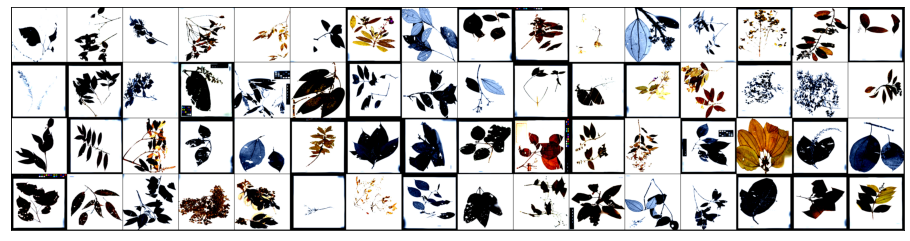

In [23]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,20))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_loader)


In [15]:
#I added this line for running the model:
model = torchvision.models.resnet50()
model.to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [16]:

# initialize our optimizer and loss function
opt = torch.optim.Adam(model.parameters(), lr=learning_rate)
lossFn = nn.CrossEntropyLoss()



In [17]:

# -------------------------------------------------------------------------------------------------------
# Train the model
# -------------------------------------------------------------------------------------------------------

for images, labels in train_loader:
    log.info(f"Shape of X [N, C, H, W]: {images.shape}")
    log.info(f"Shape of y: {labels.shape} {labels.dtype}")
    # test one flow
    # pred = model(x)
    # loss = lossFn(pred, y)
    break
total_step = len(train_loader)
log.info(f"Total steps: {total_step}")

stepsize = total_step // 100
if stepsize < 10:
    stepsize = 10


In [18]:

# Write training matrics to Tensorboard
writer = SummaryWriter()

# loop over our epochs
for epoch in range(0, num_epochs):
    # set the model in training mode
    model.train()  # IMPORTANT otherwise the model is not in training mode
    # initialize the total training and validation loss
    totalTrainLoss = 0
    totalValLoss = 0
    # initialize the number of correct predictions in the training
    # and validation step
    trainAccuracy = 0
    totalTrainAccuracy = 0
    valCorrect = 0

    # loop over the training set
    for i, (images, labels) in enumerate(train_loader):

        try:
            # Train in auto-mode with 16 bit mode
            # with torch.autocast(device_type='cuda', dtype=torch.float16):
            # Train in normal mode
            with torch.autocast(device_type="cuda", dtype=torch.float32):
                # send the input to the device
                (images, labels) = (images.to(device), labels.to(device))
                # perform a forward pass and calculate the training loss
                outputs = model(images)
                # output is float16 because linear layers autocast to float16.
                # assert outputs.dtype is torch.float16 or 64

                loss = lossFn(outputs, labels)
                # zero out the gradients, perform the backpropagation step,
                # and update the weights
                writer.add_scalar("Loss/train", loss,  (epoch * total_step)+(i+1))
                opt.zero_grad()  # IMPORTANT otherwise the gradients of previous batches are not zeroed out
        except Exception as e:
            log.error(f"Exception in data processing- skip and continue = {e}")
        loss.backward()
        totalTrainLoss += loss
        opt.step()
        # Get the predicted values
        _, predicted = torch.max(outputs.data, 1)
        trainAccuracy = (predicted == labels).float().sum().item()
        trainAccuracy = 100 * trainAccuracy / labels.size(0)
        writer.add_scalar("Accuracy/train", trainAccuracy,(epoch * total_step)+(i+1))
        totalTrainAccuracy += trainAccuracy
        # if (i // stepsize) % 10 == 0:
        log.info(
            "Epoch [{}/{}], Step [{}/{}], Loss: {:.4f} Accuracy: {:.4f}".format(
                epoch + 1, num_epochs, i + 1, total_step, loss, trainAccuracy
            )
        )

    

    avgTrainLoss = totalTrainLoss / len(train_loader)
    avgAccuracy = totalTrainAccuracy / len(train_loader)
    log.info(
        "--->Epoch [{}/{}], Average Loss: {:.4f} Average Accuracy: {:.4f}".format(
            epoch + 1, num_epochs, avgTrainLoss, avgAccuracy
        )
    )

    print('Epoch [{}/{}], Loss: {:.4f}, TrainAccuracy: {:.4f}, averageloss: {:.4f}, averageacc: {:.4f} '.format(epoch+1, num_epochs, loss, trainAccuracy, avgTrainLoss, avgAccuracy))

    # End Epoch loop
writer.flush()



KeyboardInterrupt: ignored

In [ ]:
val_size = len(val_dataset)
print(val_size)

49


In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the {} validation images: {} %'.format(19, 100 * correct / total))



Accuracy of the network on the 19 train images: 75.51020408163265 %


In [ ]:

# Save the model
#/content/drive/MyDrive/Herbarium Data-2019/SavedModel
modelname ="resnet50"
path = "/content/drive/MyDrive/Herbarium Data-2019/SavedModel"
model_save_name = path + modelname + datetime.now().strftime("%H:%M_%B%d%Y")
torch.save(model.state_dict(), model_save_name + ".pth")
log.info(f"Model {modelname} saved as {model_save_name}")



['   Miconia approximata Gamba & Almeda\t', '   Miconia ibaguensis (Bonpl.) Triana\t', '   Leandra nianga (DC.) Cogn.\t', '   Tibouchina semidecandra Cogn.\t', '   Miconia racemosa (Aubl.) DC.\t', '   Comolia lythrarioides Naudin\t', '   Mouriri myrtilloides (Sw.) Poir.\t', '   Miconia corymbiformis Cogn.\t', '   Macairea parvifolia Benth.\t', '   Brachyotum strigosum (L.f.) Triana\t']
	2.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	   Miconia approximata Gamba & Almeda	
	0.0	11.0	4.0	0.0	0.0	0.0	2.0	0.0	0.0	0.0	   Miconia ibaguensis (Bonpl.) Triana	
	0.0	0.0	2.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	   Leandra nianga (DC.) Cogn.	
	0.0	0.0	1.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	   Tibouchina semidecandra Cogn.	
	0.0	4.0	3.0	0.0	3.0	0.0	1.0	0.0	0.0	0.0	   Miconia racemosa (Aubl.) DC.	
	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	   Comolia lythrarioides Naudin	
	0.0	0.0	0.0	0.0	0.0	0.0	5.0	0.0	0.0	0.0	   Mouriri myrtilloides (Sw.) Poir.	
	0.0	0.0	1.0	0.0	0.0	0.0	0.0	2.0	0.0	0.0	   Miconia corymbiformis Cogn.	
	0.0

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


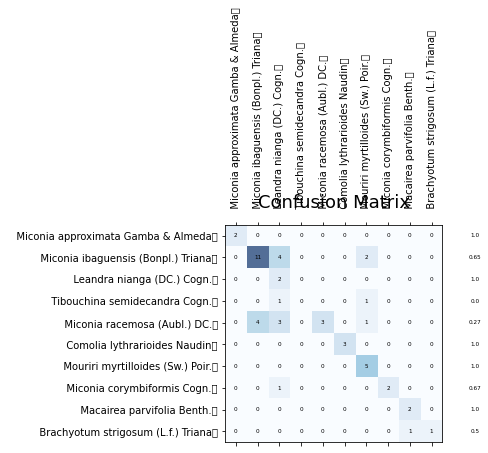

In [ ]:
# Generate the Confusion Matrix

confusion_matrix = np.zeros((len(categories), len(categories)))

# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    model.eval()  # IMPORTANT set model to eval mode before inference

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # ------------------------------------------------------------------------------------------
        # Predict for the batch of images
        # ------------------------------------------------------------------------------------------
        outputs = model(
            images
        )  # Outputs= torch.Size([64, 10]) Probability of each of the 10 classes
        _, predicted = torch.max(
            outputs.data, 1
        )  # get the class with the highest Probability out Given 1 per image # predicted= torch.Size([64])
        # ------------------------------------------------------------------------------------------
        #  Lets check also which classes are wrongly predicted with other classes  to create a MultiClass confusion matrix
        # ------------------------------------------------------------------------------------------

        mask = predicted != labels  # Wrongly predicted
        wrong_predicted = torch.masked_select(predicted, mask)
        wrong_labels = torch.masked_select(labels, mask)
        wrongly_zipped = zip(wrong_labels, wrong_predicted)

        mask = predicted == labels  # Rightly predicted
        rightly_predicted = torch.masked_select(predicted, mask)
        right_labels = rightly_predicted  # same torch.masked_select(labels,mask)
        rightly_zipped = zip(right_labels, rightly_predicted)

        # Note that this is for a single batch - add to the list associated with class
        for _, j in enumerate(wrongly_zipped):
            k = j[0].item()  # label
            l = j[1].item()  # predicted
            confusion_matrix[k][l] += 1

        # Note that this is for a single batch - add to the list associated with class
        for _, j in enumerate(rightly_zipped):
            k = j[0].item()  # label
            l = j[1].item()  # predicted
            confusion_matrix[k][l] += 1

    # print("Confusion Matrix1=\n",confusion_matrix)
    # ------------------------------------------------------------------------------------------
    # Print Confusion matrix in Pretty print format
    # ------------------------------------------------------------------------------------------
    print(categories)
    for i in range(len(categories)):
        for j in range(len(categories)):
            print(f"\t{confusion_matrix[i][j]}", end="")
        print(f"\t{categories[i]}\n", end="")
    # ------------------------------------------------------------------------------------------
    # Calculate Accuracy per class
    # ------------------------------------------------------------------------------------------
    print("---------------------------------------")
    print(
        f"Accuracy/precision from confusion matrix is {round(confusion_matrix.trace()/confusion_matrix.sum(),2)}"
    )
    print("---------------------------------------")
    for i in range(len(categories)):
        print(
            f"---Accuracy for class {categories[i]} = {round(confusion_matrix[i][i]/confusion_matrix[i].sum(),2)}"
        )

    # ---------------------------------------------------
    # Plot this in a good figure
    # ---------------------------------------------------

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title("Confusion Matrix", fontsize=18)
    ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.7)
    ax.set_xticklabels([""] + categories, rotation=90)
    ax.set_yticklabels([""] + categories)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(
                x=j,
                y=i,
                s=int(confusion_matrix[i, j]),
                va="center",
                ha="center",
                size="xx-small",
            )
            if i == j:
                acc = round(confusion_matrix[i][i] / confusion_matrix[i].sum(), 2)
                ax.text(
                    x=len(categories) + 1,
                    y=i,
                    s=acc,
                    va="center",
                    ha="center",
                    size="xx-small",
                )
    plt.savefig(model_save_name + "_cm.jpg")

    # correct = 0
    # total = 0
    # for images, labels in train_loader:
    #     images = images.to(device)
    #     labels = labels.to(device)
    #     outputs = model(images)
    #     _, predicted = torch.max(outputs.data, 1)
    #     total += labels.size(0)
    #     correct += (predicted == labels).float().sum().item()
    # # this is not really not needed- but just to cross check if what we calculated during training is accurate
    # print(
    #     "Accuracy of the network on the {} Train images: {} %".format(
    #         total, 100 * correct / total
    #     )
    # )


"""
Pre trained  model from tutorial modified from
https://pytorch.org/hub/pytorch_vision_alexnet/
And for imagenette small dataset
Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute).
https://github.com/fastai/imagenette
Load the Pre-trained models generated from test4_cnn_imagenet_small.py in the same folder
"""

In [ ]:

from importlib.resources import path
from PIL import Image
from torchvision import transforms,datasets
import torch
#from models import resnet, alexnet, mycnn, mycnn2
import os


In [ ]:
!pwd

/content/drive/MyDrive/Model Data/Logs


In [ ]:

test_images = ['00000.jpg','00001.jpg','00002.jpg','00003.jpg','00004.jpg','00005.jpg','00006.jpg','00007.jpg',
"00008.jpg","00009.jpg"]

##/content/drive/MyDrive/Model Data/test-images
#/content/drive/MyDrive/Model Data/imagenette/imagenette2-320/train
#/content/drive/MyDrive/Herbarium Data-2019/Data/test

data_dir = "/content/drive/MyDrive/Herbarium Data-2019/Data/sample/test"
train_dir = os.path.join(data_dir, "/content/drive/MyDrive/Herbarium Data-2019/Data/sample/train")
train_dataset = datasets.ImageFolder(train_dir,[])


In [ ]:
#-----------------------------------------------------------------------------------------------------
# Order the categories as per how Dataloader loads it
#-----------------------------------------------------------------------------------------------------
#I commented this sell
# foldername_to_class = { 'n02102040' : "dog",
#                         'n01440764': "tench",
#                         'n02979186': "cassette player", 
#                         'n03000684': "chain saw",
#                         'n03028079': "church",
#                         'n03394916': "French horn",
#                         'n03417042': "garbage truck",
#                         'n03425413': "gas pump",
#                         'n03445777':  "golf ball",
#                         'n03888257': "parachute" }

In [ ]:
# sort as value to fit the directory order to labels to be sure
print("Image to Folder Index",train_dataset.class_to_idx)
sorted_vals = dict(sorted(train_dataset.class_to_idx.items(), key=lambda item: item[1]))
categories =[]
for key in sorted_vals:
    classname = foldername_to_class[key]
    categories.append(classname)

print("Categories",categories)

Image to Folder Index {'h0sample': 0, 'h1sample': 1, 'h2sample': 2, 'h3sample': 3, 'h4sample': 4, 'h5sample': 5, 'h6sample': 6, 'h7sample': 7, 'h8sample': 8, 'h9sample': 9}
Categories ['   Miconia approximata Gamba & Almeda\t', '   Miconia ibaguensis (Bonpl.) Triana\t', '   Leandra nianga (DC.) Cogn.\t', '   Tibouchina semidecandra Cogn.\t', '   Miconia racemosa (Aubl.) DC.\t', '   Comolia lythrarioides Naudin\t', '   Mouriri myrtilloides (Sw.) Poir.\t', '   Miconia corymbiformis Cogn.\t', '   Macairea parvifolia Benth.\t', '   Brachyotum strigosum (L.f.) Triana\t']


In [ ]:

# Choose a saved Model - assign the name you want to test with
# (assuming that you have trained the models)
## I commented this:
#modelname = "resnet50"

#if modelname == "mycnn":
 #   model = mycnn.MyCNN()
  #  path = "mycnn_18:07_October142022.pth" 
  #  resize_to = transforms.Resize((227, 227))
#if modelname == "mycnn2":
 #   model = mycnn2.MyCNN2()
  #  path ="mycnn2_16:43_October182022.pth"
   # resize_to = transforms.Resize((227, 227))
#if modelname == "alexnet":
 #   model = alexnet.AlexNet()
  #  path = "alexnet_15:08_August082022.pth"
  #  resize_to = transforms.Resize((227, 227))
  #/content/drive/MyDrive/Model Data/saved_models/resnet5022:49_December272022.pth
  #/content/drive/MyDrive/Model Data/saved_models/resnet5019:13_December292022.pth

####### I commented this:
#if modelname == "resnet50":
#    model = resnet.ResNet50(img_channel=3, num_classes=10)
#   path ="../saved_models/resnet5019:13_December292022.pth"
    #resize_to = transforms.Resize((227, 227))

#path = "cnn/saved_models/" +path
resize_to = transforms.Resize((227, 227))
#model.load_state_dict(torch.load(path))
model.eval()

for filename in test_images:
    input_image = Image.open('/content/drive/MyDrive/Herbarium Data-2019/Data/sample/test/'+filename)
    preprocess = transforms.Compose(
        [
            resize_to,
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
            ),  # IMPORTANT: normalize for pretrained models
        ]
    )
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)  # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to("cuda")
        model.to("cuda")

    with torch.no_grad():
        output = model(input_batch)
    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    # print(probabilities)
    print(f"Detecting for class {filename} model {modelname}")
    print("--------------------------------")
    # Show top categories per image
    top5_prob, top5_catid = torch.topk(probabilities, 2)
    for i in range(top5_prob.size(0)):
        print(categories[top5_catid[i]], top5_prob[i].item())
    print("--------------------------------")

Detecting for class 00001.jpg model resnet50
--------------------------------
   Miconia approximata Gamba & Almeda	 0.950956404209137
   Mouriri myrtilloides (Sw.) Poir.	 0.03590662404894829
--------------------------------
Detecting for class 00002.jpg model resnet50
--------------------------------
   Mouriri myrtilloides (Sw.) Poir.	 0.7845208048820496
   Miconia ibaguensis (Bonpl.) Triana	 0.2154436558485031
--------------------------------
Detecting for class 00003.jpg model resnet50
--------------------------------
   Mouriri myrtilloides (Sw.) Poir.	 0.9899343848228455
   Miconia approximata Gamba & Almeda	 0.01004299707710743
--------------------------------
Detecting for class 00004.jpg model resnet50
--------------------------------
   Mouriri myrtilloides (Sw.) Poir.	 0.7259215116500854
   Miconia approximata Gamba & Almeda	 0.2718796730041504
--------------------------------
Detecting for class 00005.jpg model resnet50
--------------------------------
   Miconia ibaguensis

**Utility to check Precision and Recall of a  trained model Author - Alex Punnen**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import logging as log
#from models import resnet, alexnet, mycnn, mycnn2
import os
import sklearn.metrics as skmc #this has confusion matrix but need to give all in a shot ?


In [ ]:
log.basicConfig(format="%(asctime)s %(message)s", level=log.INFO)
torch.cuda.empty_cache()

In [ ]:

# Device will determine whether to run the training on GPU or CPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if device.type == "cuda":
    deviceid = torch.cuda.current_device()
    log.info(f"Gpu device {torch.cuda.get_device_name(deviceid)}")


In [ ]:


# Choose a saved Model - assign the name you want to test with
# (assuming that you have trained the models)
# I commented this:
#modelname = "resnet50"
    
#if modelname == "mycnn":
#    model = mycnn.MyCNN()
#    path =  "mycnn_11:49_October302022.pth" 
#    resize_to = transforms.Resize((150, 150))
#if modelname == "mycnn2":
#    model = mycnn2.MyCNN2()
#    path ="mycnn2_16:43_October182022.pth"
#    resize_to = transforms.Resize((227, 227))
#if modelname == "alexnet":
#    model = alexnet.AlexNet()
#    path = "./alexnet_15:08_August082022.pth"
#    resize_to = transforms.Resize((227, 227))
#if modelname == "resnet50":
#    model = resnet.ResNet50(img_channel=3, num_classes=10)
#    path = "./RestNet50_11:43_October072022.pth"   # trained with more dog images from imagenet
#    path ="./RestNet50_11:45_November072022.pth"
#    resize_to = transforms.Resize((227, 227))

#path = "cnn/saved_models/" +path
#model.load_state_dict(torch.load(path))
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# -------------------------------------------------------------------------------------------------------
# Load the data from image folder
# -------------------------------------------------------------------------------------------------------
#/content/drive/MyDrive/Model Data/imagenette/imagenette2-320
data_dir = "/content/drive/MyDrive/Herbarium Data-2019/Data/sample"


train_dir = os.path.join(data_dir, "train")
normalize_transform = transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
)


train_transforms = transforms.Compose(
    [resize_to, 
    transforms.RandomHorizontalFlip(),
    transforms.RandomGrayscale(),
    transforms.ToTensor(), normalize_transform]
)

val_dir = os.path.join(data_dir, "val")

val_transforms = transforms.Compose(
    [resize_to, transforms.ToTensor(), normalize_transform]
)


train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)

val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)


In [ ]:
#-----------------------------------------------------------------------------------------------------
# Order the categories as per how Dataloader loads it
#-----------------------------------------------------------------------------------------------------
#I commented this
# foldername_to_class = { 'n02102040' : "dog",
#                         'n01440764': "tench",
#                         'n02979186': "cassette player", 
#                         'n03000684': "chain saw",
#                         'n03028079': "church",
#                         'n03394916': "French horn",
#                         'n03417042': "garbage truck",
#                         'n03425413': "gas pump",
#                         'n03445777':  "golf ball",
#                         'n03888257': "parachute" }

# Imagenette classes - labels for better description
#categories_ref = [
#    "English springer",
#    "tench",
#    "cassette player",
#    "chain saw",
#    "church",
#    "French horn",
#    "garbage truck",
#    "gas pump",
#    "golf ball",
#    "parachute",
#]


In [ ]:
# sort as value to fit the directory order to labels to be sure
print("Image to Folder Index",train_dataset.class_to_idx)
sorted_vals = dict(sorted(train_dataset.class_to_idx.items(), key=lambda item: item[1]))
categories =[]
for key in sorted_vals:
    classname = foldername_to_class[key]
    categories.append(classname)

print("Categories",categories)


Image to Folder Index {'h0sample': 0, 'h1sample': 1, 'h2sample': 2, 'h3sample': 3, 'h4sample': 4, 'h5sample': 5, 'h6sample': 6, 'h7sample': 7, 'h8sample': 8, 'h9sample': 9}
Categories ['   Miconia approximata Gamba & Almeda\t', '   Miconia ibaguensis (Bonpl.) Triana\t', '   Leandra nianga (DC.) Cogn.\t', '   Tibouchina semidecandra Cogn.\t', '   Miconia racemosa (Aubl.) DC.\t', '   Comolia lythrarioides Naudin\t', '   Mouriri myrtilloides (Sw.) Poir.\t', '   Miconia corymbiformis Cogn.\t', '   Macairea parvifolia Benth.\t', '   Brachyotum strigosum (L.f.) Triana\t']


In [ ]:
# -------------------------------------------------------------------------------------------------------
# Initialise the data loaders
# -------------------------------------------------------------------------------------------------------

workers = 2
pin_memory = True
batch_size = 64

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True, #IMPORTANT otherwise the data is not shuffled
    num_workers=workers,
    pin_memory=pin_memory,
    sampler=None,
)

test_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=workers,
    pin_memory=pin_memory,
)

Image to Folder Index {'h0sample': 0, 'h1sample': 1, 'h2sample': 2, 'h3sample': 3, 'h4sample': 4, 'h5sample': 5, 'h6sample': 6, 'h7sample': 7, 'h8sample': 8, 'h9sample': 9}
['   Miconia approximata Gamba & Almeda\t', '   Miconia ibaguensis (Bonpl.) Triana\t', '   Leandra nianga (DC.) Cogn.\t', '   Tibouchina semidecandra Cogn.\t', '   Miconia racemosa (Aubl.) DC.\t', '   Comolia lythrarioides Naudin\t', '   Mouriri myrtilloides (Sw.) Poir.\t', '   Miconia corymbiformis Cogn.\t', '   Macairea parvifolia Benth.\t', '   Brachyotum strigosum (L.f.) Triana\t']
	0.0	2.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	   Miconia approximata Gamba & Almeda	
	3.0	7.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	   Miconia ibaguensis (Bonpl.) Triana	
	0.0	1.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	   Leandra nianga (DC.) Cogn.	
	0.0	0.0	0.0	0.0	0.0	0.0	2.0	0.0	0.0	0.0	   Tibouchina semidecandra Cogn.	
	3.0	1.0	4.0	0.0	0.0	0.0	2.0	1.0	0.0	0.0	   Miconia racemosa (Aubl.) DC.	
	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	   Comolia lythr

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


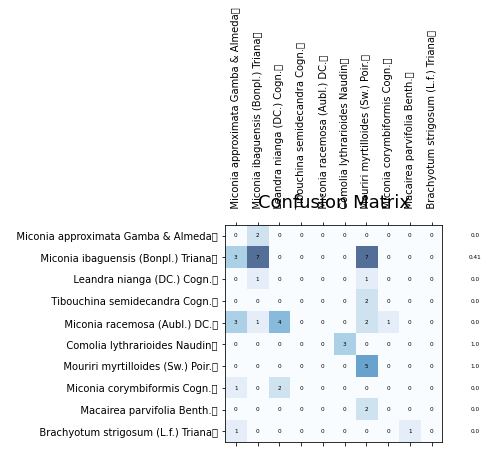

In [ ]:
# -------------------------------------------------------------------------------------------------------
#  Test the model - Find accuracy and per class
# -------------------------------------------------------------------------------------------------------

print("Image to Folder Index",train_dataset.class_to_idx)

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    model.to("cuda")

confusion_matrix = np.zeros((len(categories),len(categories)))

# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    model.eval() #IMPORTANT set model to eval mode before inference
    # correct = 0
    # total = 0


    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # ------------------------------------------------------------------------------------------
        # Predict for the batch of images
        # ------------------------------------------------------------------------------------------
        outputs = model(images)  #Outputs= torch.Size([64, 10]) Probability of each of the 10 classes
        _, predicted = torch.max(outputs.data, 1) # get the class with the highest Probability out Given 1 per image # predicted= torch.Size([64])
        # total += labels.size(0) #labels= torch.Size([64])  This is the truth value per image - the right class
        # correct += (predicted == labels).float().sum().item()  # Find which are correctly classified
        
        # Below illustrates the above Torch Tensor semantics
        # >>> import torch
        # >>> some_integers = torch.tensor((2, 3, 5, 7, 11, 13, 17, 19))
        # >>> some_integers3 = torch.tensor((12, 3, 5, 7, 11, 13, 17, 19))
        # >>> (some_integers ==some_integers3)*(some_integers == 3)
        # tensor([False,  True, False, False, False, False, False, False])
        # >>> ((some_integers ==some_integers3)*(some_integers >12)).sum().item()
        # 3
        
        # ------------------------------------------------------------------------------------------
        #  Lets check also which classes are wrongly predicted with other classes  to create a MultiClass confusion matrix
        # ------------------------------------------------------------------------------------------

        mask=(predicted != labels) # Wrongly predicted
        wrong_predicted =torch.masked_select(predicted,mask)
        wrong_labels =torch.masked_select(labels,mask)
        wrongly_zipped = zip(wrong_labels,wrong_predicted)

        mask=(predicted == labels) # Rightly predicted
        rightly_predicted =torch.masked_select(predicted,mask)
        right_labels =rightly_predicted #same torch.masked_select(labels,mask)
        rightly_zipped = zip(right_labels,rightly_predicted)
        
        # Note that this is for a single batch - add to the list associated with class
        for _,j in enumerate(wrongly_zipped):
            k = j[0].item() # label
            l = j[1].item() # predicted
            confusion_matrix[k][l] +=1
       
        # Note that this is for a single batch - add to the list associated with class
        for _,j in enumerate(rightly_zipped):
            k = j[0].item() # label
            l = j[1].item() # predicted
            confusion_matrix[k][l] +=1
    
    #print("Confusion Matrix1=\n",confusion_matrix)
    # ------------------------------------------------------------------------------------------
    # Print Confusion matrix in Pretty print format
    # ------------------------------------------------------------------------------------------
    print(categories)
    for i in range(len(categories)):
        for j in range(len(categories)):
            print(f"\t{confusion_matrix[i][j]}",end='')
        print(f"\t{categories[i]}\n",end='')
    # ------------------------------------------------------------------------------------------
    # Calculate Accuracy per class
    # ------------------------------------------------------------------------------------------
    print("---------------------------------------")
    print(f"Accuracy/precision from confusion matrix is {round(confusion_matrix.trace()/confusion_matrix.sum(),2)}")
    print("---------------------------------------")
    for i in range(len(categories)):
        print(f"---Accuracy for class {categories[i]} = {round(confusion_matrix[i][i]/confusion_matrix[i].sum(),2)}")
    
    # ---------------------------------------------------
    # Plot this in a good figure
    # ---------------------------------------------------
        

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title('Confusion Matrix', fontsize=18)
    ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.7)
    ax.set_xticklabels([''] + categories,rotation=90)
    ax.set_yticklabels([''] + categories)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(x=j, y=i,s=int(confusion_matrix[i, j]), va='center', ha='center', size='xx-small')
            if ( i==j):
                acc = round(confusion_matrix[i][i]/confusion_matrix[i].sum(),2)
                ax.text(x=len(categories)+1, y=i,s=acc, va='center', ha='center', size='xx-small')
    plt.savefig("confusion_matrix_"+modelname +".jpg")

    # correct = 0
    # total = 0
    # for images, labels in train_loader:
    #     images = images.to(device)
    #     labels = labels.to(device)
    #     outputs = model(images)
    #     _, predicted = torch.max(outputs.data, 1)
    #     total += labels.size(0)
    #     correct += (predicted == labels).float().sum().item()
    # # this is not really not needed- but just to cross check if what we calculated during training is accurate
    # print(
    #     "Accuracy of the network on the {} Train images: {} %".format(
    #         total, 100 * correct / total
    #     )
    # )



***Model Explain-ability GradCam***
Gradcam helps one visualize which parts of the images are important for the CNN when it classifies an object with high probability. After testing a model, you can use this to visualize and debug the test results

""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


Using Grad CAM libray to visualize the gradients of the last layer
and to see if the model has learned the features of the images

In [ ]:
!pip install grad_cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad_cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=ceb497ae464c75d18d6a1f167308442e490dc02f9291109ad8073f0d4833c773
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad_cam


In [ ]:
from pytorch_grad_cam import (
    GradCAM,
    HiResCAM,
    ScoreCAM,
    GradCAMPlusPlus,
    AblationCAM,
    XGradCAM,
    EigenCAM,
    FullGrad,
)
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image


from importlib.resources import path
from PIL import Image
from torchvision import transforms, datasets
import torch
#from models import resnet, alexnet, mycnn, mycnn2
import numpy as np
import os
import torch.nn as nn

In [ ]:
#-----------------------------------------------------------------------------------------------------
# Order the categories as per how Dataloader loads it
#-----------------------------------------------------------------------------------------------------
#/content/drive/MyDrive/Model Data/imagenette/imagenette2-320

data_dir = "/content/drive/MyDrive/Herbarium Data-2019/Data/sample"
train_dir = os.path.join(data_dir, "train")
train_dataset = datasets.ImageFolder(train_dir,[])

# foldername_to_class = { 'n02102040' : "dog",
#                         'n01440764': "tench",
#                         'n02979186': "cassette player", 
#                         'n03000684': "chain saw",
#                         'n03028079': "church",
#                         'n03394916': "French horn",
#                         'n03417042': "garbage truck",
#                         'n03425413': "gas pump",
#                         'n03445777':  "golf ball",
#                         'n03888257': "parachute" }


# sort as value to fit the directory order to labels to be sure
print("Image to Folder Index",train_dataset.class_to_idx)
sorted_vals = dict(sorted(train_dataset.class_to_idx.items(), key=lambda item: item[1]))
categories =[]
for key in sorted_vals:
    classname = foldername_to_class[key]
    categories.append(classname)

print("Categories",categories)


Image to Folder Index {'h0sample': 0, 'h1sample': 1, 'h2sample': 2, 'h3sample': 3, 'h4sample': 4, 'h5sample': 5, 'h6sample': 6, 'h7sample': 7, 'h8sample': 8, 'h9sample': 9}
Categories ['   Miconia approximata Gamba & Almeda\t', '   Miconia ibaguensis (Bonpl.) Triana\t', '   Leandra nianga (DC.) Cogn.\t', '   Tibouchina semidecandra Cogn.\t', '   Miconia racemosa (Aubl.) DC.\t', '   Comolia lythrarioides Naudin\t', '   Mouriri myrtilloides (Sw.) Poir.\t', '   Miconia corymbiformis Cogn.\t', '   Macairea parvifolia Benth.\t', '   Brachyotum strigosum (L.f.) Triana\t']


In [ ]:
# Choose a saved Model - comment out the rest
# I commented this:
#modelname = "resnet50"

# Choose a saved Model - assign the name you want to test with
# (assuming that you have trained the models)
#modelname = "resnet50"
#resize_size =(1,1)
#if modelname == "mycnn":
#    resize_size = (227, 227)
#    model = mycnn.MyCNN()
#    path = "mycnn_18:07_October142022.pth"
#    path ="mycnn_13:01_October272022.pth" #dual class only
#    resize_to = transforms.Resize(resize_size)
#if modelname == "mycnn2":
#    resize_size = (227, 227)
#    model = mycnn2.MyCNN2()
#    path ="mycnn2_16:43_October182022.pth"
#    resize_to = transforms.Resize(resize_size)
#if modelname == "alexnet":
#    resize_size = (227,227)
#    model = alexnet.AlexNet()
#    path = "alexnet_20:56_October102022.pth"
#    resize_to = transforms.Resize(resize_size)
#if modelname == "resnet50":
#    model = resnet.ResNet50(img_channel=3, num_classes=10)
#    resize_size =(227,227)
    #path = "./RestNet50_12:26_August082022.pth" # without augumentation
#    path = "RestNet50_13:49_September102022.pth" #with augumentation
#    path = "RestNet50_16:54_October062022.pth" #with cartoon dogs
#    path = "RestNet50_11:43_October072022.pth"   # trained with more dog images from imagenet
#    path ="RestNet50_11:45_November072022.pth" #227*227
   # resize_to = transforms.Resize(227,227)

#path = "cnn/saved_models/" +path
#model.load_state_dict(torch.load(path))
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:

def flatten_model(modules):
    def flatten_list(_2d_list):
        flat_list = []
        # Iterate through the outer list
        for element in _2d_list:
            if type(element) is list:
                # If the element is of type list, iterate through the sublist
                for item in element:
                    flat_list.append(item)
            else:
                flat_list.append(element)
        return flat_list

    ret = []
    try:
        for _, n in modules:
            ret.append(loopthrough(n))
    except:
        try:
            if str(modules._modules.items()) == "odict_items([])":
                ret.append(modules)
            else:
                for _, n in modules._modules.items():
                    ret.append(loopthrough(n))
        except:
            ret.append(modules)
    return flatten_list(ret)




In [ ]:
# Set the target for the CAM layer; Add all the layers in the model
target_layers =[]
module_list =[module for module in model.modules()]


flatted_list= flatten_model(module_list)


print("------------------------")
for count, value in enumerate(flatted_list):
    
    if isinstance(value, (nn.Conv2d,nn.AvgPool2d,nn.BatchNorm2d)):
    #if isinstance(value, (nn.Conv2d)):
        print(count, value)
        target_layers.append(value)

print("------------------------")


------------------------
1 Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
2 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
7 Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
8 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
9 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
10 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
11 Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
12 BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
15 Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
16 BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
18 Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
19 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
20 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [ ]:
# Alternative is to add specific layers and check
# if modelname=='resnet50':
#     #target_layers = [module_list[142],module_list[143],module_list[144],module_list[145],module_list[146],module_list[147]]
#     target_layers = [module_list[35],module_list[36],module_list[37],module_list[38],module_list[39],module_list[40]]
# if modelname=='mycnn':
#     target_layers = [module_list[11],module_list[8],module_list[5],module_list[2],module_list[4],module_list[7],module_list[10],module_list[13]] # CNN and Avg pooling
#     #target_layers = [module_list[11],module_list[8],module_list[5],module_list[2]] # CNN only

    
# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)



In [ ]:
!pwd


/content/drive/MyDrive/Herbarium Data-2019/SavedModel


In [ ]:
# Load the images
#/content/drive/MyDrive/Model Data/test-images

resize_size =(227,227)



test_images = ['approximata.jpg','ibaguensis.jpg','nianga.jpg','semidecandra.jpg','racemosa.jpg','lythrarioides.jpg','myrtilloides.jpg',
"corymbiformis.jpg","parvifolia.jpg","strigosum.jpg"]

for filename in test_images:
    input_image = Image.open('/content/drive/MyDrive/Herbarium Data-2019/Data/sample/test/'+filename)

    preprocess = transforms.Compose(
        [
            resize_to,
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
            ),  # IMPORTANT: normalize for pre-trained models
        ]
    )
    input_tensor = preprocess(input_image)
    print("Input Tensor Shape:", input_tensor.shape)
    input_batch = input_tensor.unsqueeze(0)  # create a mini-batch as expected by the model
    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to("cuda")
        model.to("cuda")
        input_tensor = input_tensor.to("cuda")

    # We have to specify the target we want to generate
    # the Class Activation Maps for.
    # If targets is None, the highest scoring category
    # will be used for every image in the batch.
    # Here we use ClassifierOutputTarget, but you can define your own custom targets

    # That are, for example, combinations of categories, or specific outputs in a non standard model.
    targets = [ClassifierOutputTarget(6)] #0 for finch ?

    # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
    grayscale_cam = cam(input_batch, targets=None,aug_smooth=True)
    #print( "len grayscale_cam",len(grayscale_cam),grayscale_cam.shape)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]
    # from PIL import Image
    # im = Image.fromarray(grayscale_cam)
    # if im.mode != 'RGB':
    #     im = im.convert('L')
    # im.save("grayscale_cam.jpeg"

#/content/drive/MyDrive/Model Data/gradcam_out

    img=np.array(input_image.resize(resize_size),np.float32)
    img = img.reshape(img.shape[1],img.shape[0],img.shape[2])
    #print("img shape",img.shape,img.max())
    img = img/255
    visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)
    #cam_images = [show_cam_on_image(img, grayscale, use_rgb=True) for img, grayscale in zip(input_image, grayscale_cam)]
    visualization = Image.fromarray(visualization)
    out_file_name ="../gradcam_out/" +modelname+ "_" + os.path.basename(filename)
    visualization.save(out_file_name)
    #print("Visualization saved- now trying to show (GUI mode)")
    im = Image.open(out_file_name)
    im.show()
    



Input Tensor Shape: torch.Size([3, 227, 227])
Input Tensor Shape: torch.Size([3, 227, 227])
Input Tensor Shape: torch.Size([3, 227, 227])
Input Tensor Shape: torch.Size([3, 227, 227])
Input Tensor Shape: torch.Size([3, 227, 227])
Input Tensor Shape: torch.Size([3, 227, 227])
Input Tensor Shape: torch.Size([3, 227, 227])
Input Tensor Shape: torch.Size([3, 227, 227])
Input Tensor Shape: torch.Size([3, 227, 227])
Input Tensor Shape: torch.Size([3, 227, 227])


In [ ]:
if modelname == "resnet50":

    #torchvision.models.resnet50()
    model2 = resnet.ResNet50(img_channel=3, num_classes=10)
    path ="/content/drive/MyDrive/Herbarium Data-2019/SavedModelresnet5021:34_January132023.pth"
    resize_to = transforms.Resize((227, 227))

model2.load_state_dict(torch.load(path))
model2.eval()